In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sales_data_with_discounts.csv')

In [3]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [5]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Descriptive analysis

In [7]:
#checking for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [14]:
#mean
mean = data[numerical_columns].mean()

In [15]:
#median
median = data[numerical_columns].median()

In [16]:
#mode
mode = data[numerical_columns].mode().iloc[0]

In [17]:
#standard deviation
std = data[numerical_columns].mean()

In [19]:
# Create a DataFrame to hold the results
stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std
})

print(stats)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            5.066667
Avg Price          10453.433333  1450.000000    400.000000        10453.433333
Total Sales Value  33812.835556  5700.000000  24300.000000        33812.835556
Discount Rate (%)     15.155242    16.577766      5.007822           15.155242
Discount Amount     3346.499424   988.933733     69.177942         3346.499424
Net Sales Value    30466.336131  4677.788059    326.974801        30466.336131


Data visualization

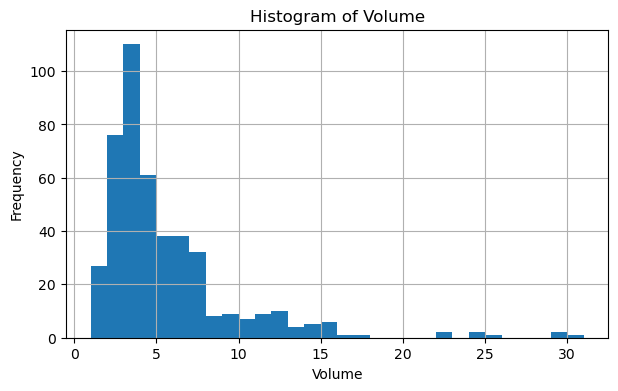

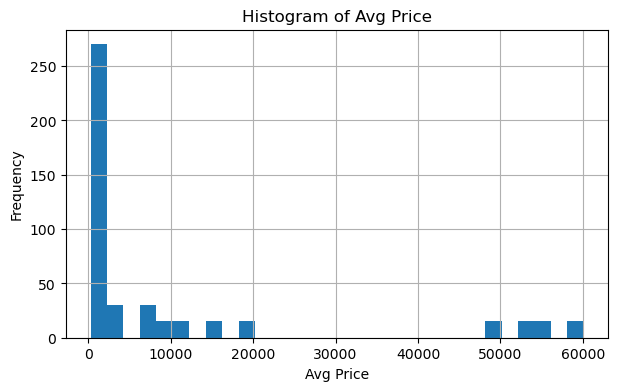

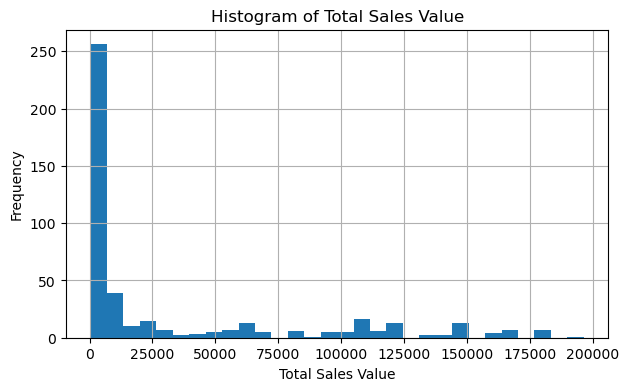

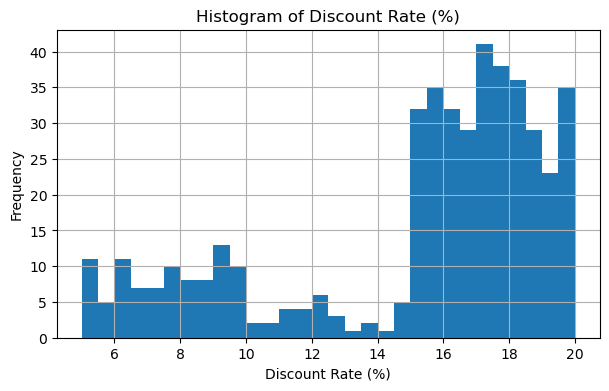

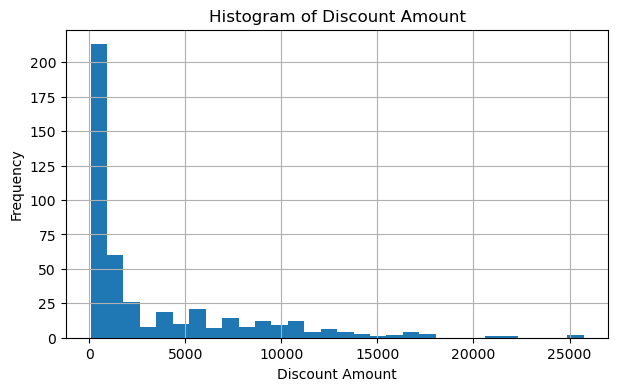

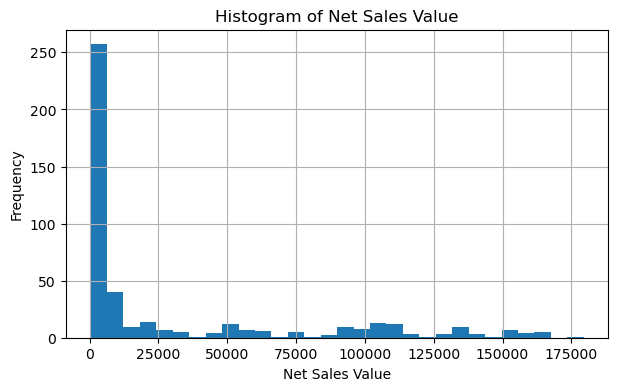

In [21]:
#histogram for numerical featuress
for column in numerical_columns:
    plt.figure(figsize=(7, 4))
    data[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#Avg Price - after 40000 on x-axis there are outliers
#Discount Amount - after 20000 on x-axis there are outliers
#Net Sales value - on 175000 on x-axis there are outliers

In [30]:
#calculate skewness of numerical column
data[numerical_columns].skew()

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

In [ ]:
#From histograms, we can observe the skewness and presence of outliers in the data.

#volume ,Net Sales value ,Discount Amount,Total Sales value, Avg price- Right-skewed distributions
# Discount rate - Left-skewed distributions

#based on skewness value
#volume ,Net Sales value ,Discount Amount,Total Sales value, Avg price-highly skewed
# Discount rate - moderately skewed

In [ ]:
#Once you calculate skewness, you can categorize the extent of the skew:

#(-0.5, 0.5) — low or approximately symmetric.
#(-1, -0.5) or (0.5, 1) — moderately skewed.
#Beyond -1 and 1 — Highly skewed.

<Axes: >

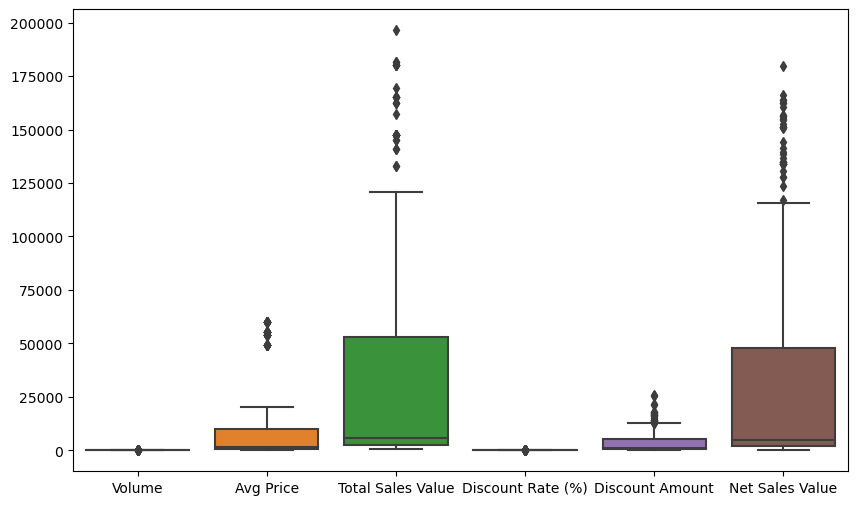

In [29]:
#boxplots for numerical features
plt.figure(figsize=(10,6))
sns.boxplot(data=data[numerical_columns])

In [31]:
# There is outlier present in Avg Price,Total Sales Value,Discount Amount,Net Sales Value

In [44]:
#interquartile range
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
IQR

Volume                   3.000000
Avg Price             9635.000000
Total Sales Value    50500.000000
Discount Rate (%)        4.149656
Discount Amount       4856.036123
Net Sales Value      45645.704206
dtype: float64

In [45]:
#identify categorical column
categorical_columns =[]
for col in data.columns:
    if data[col].dtype == 'object':
        categorical_columns.append(col)
print(categorical_columns)

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


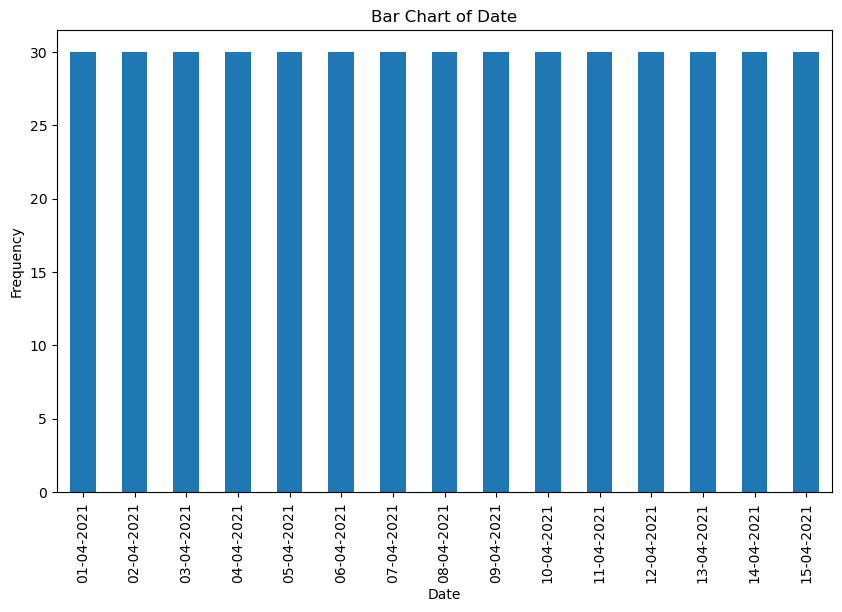

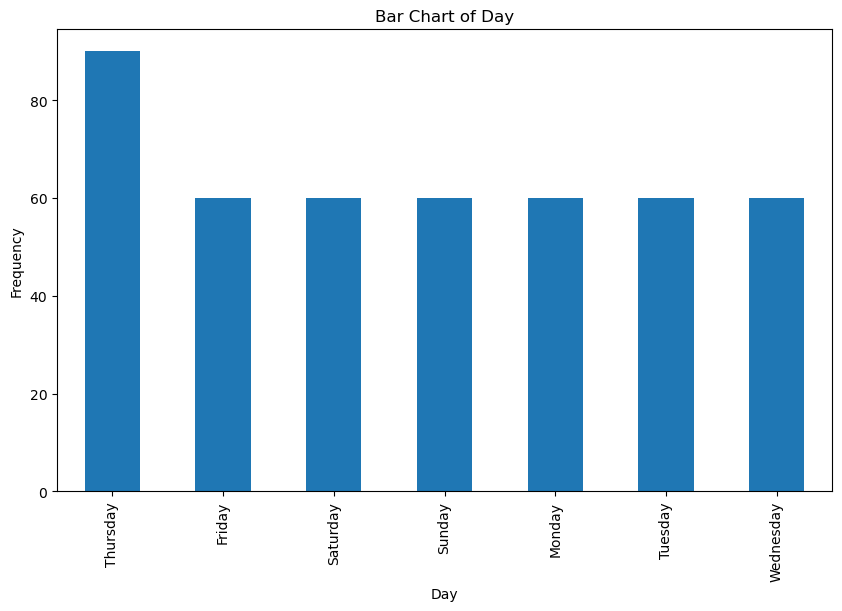

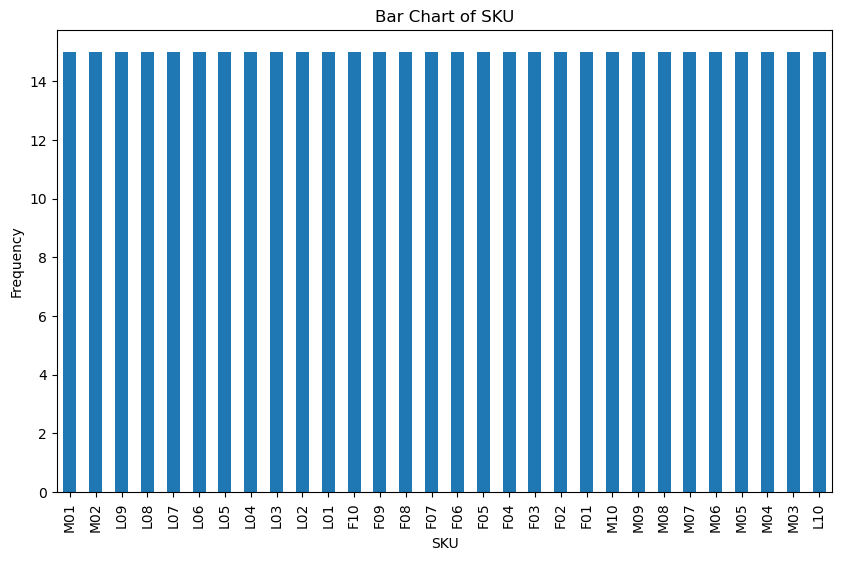

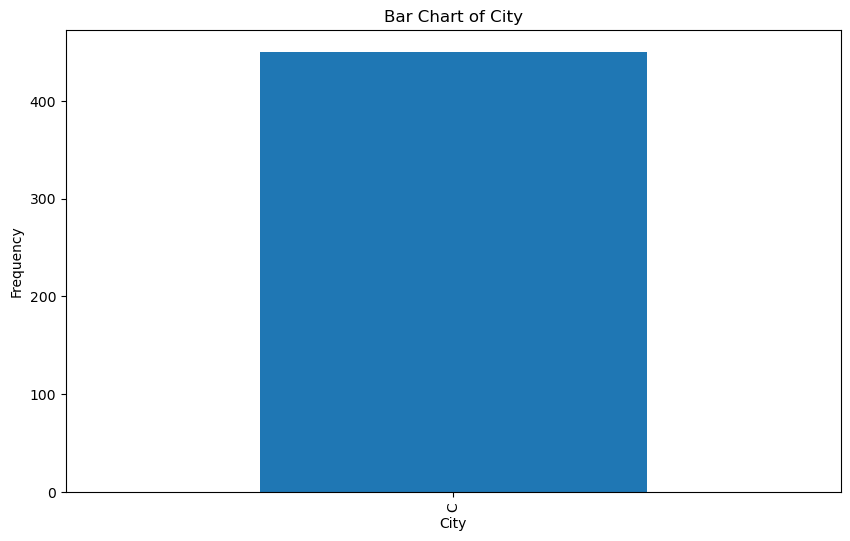

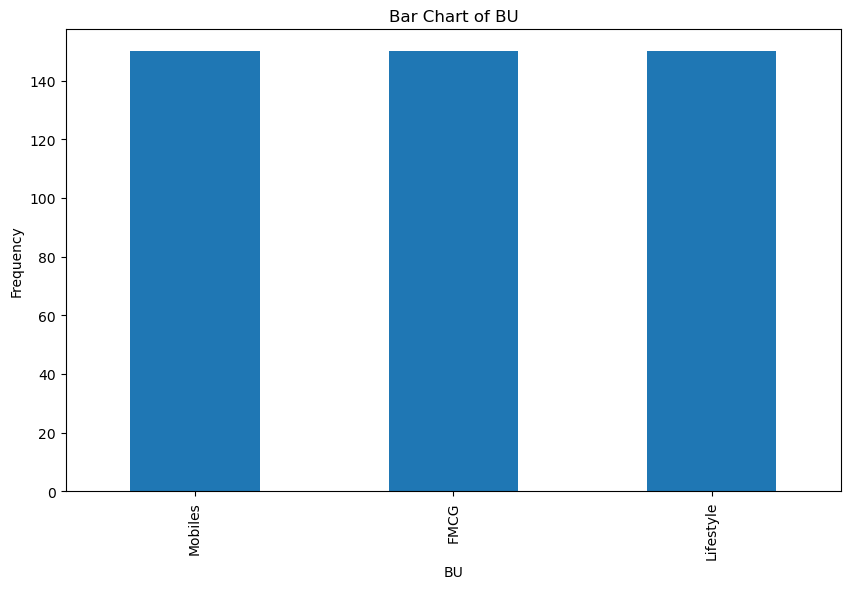

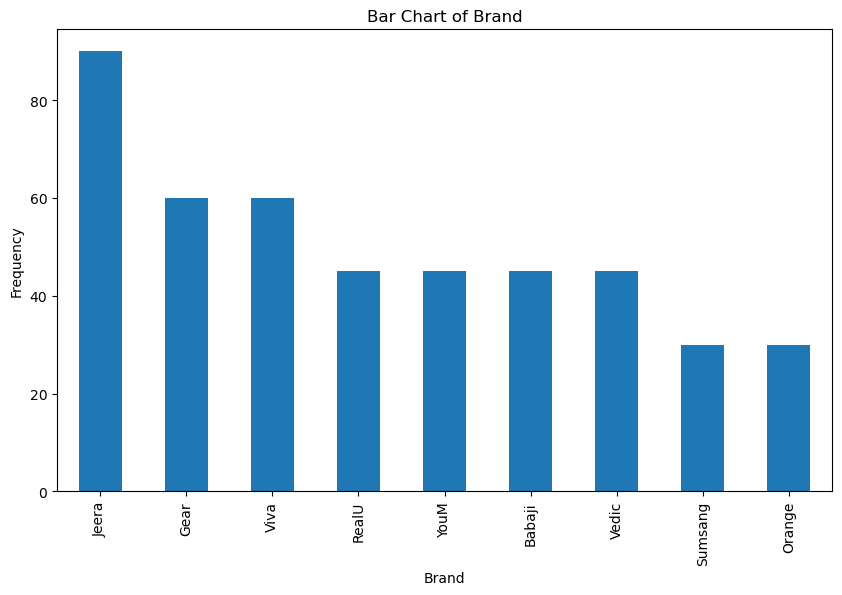

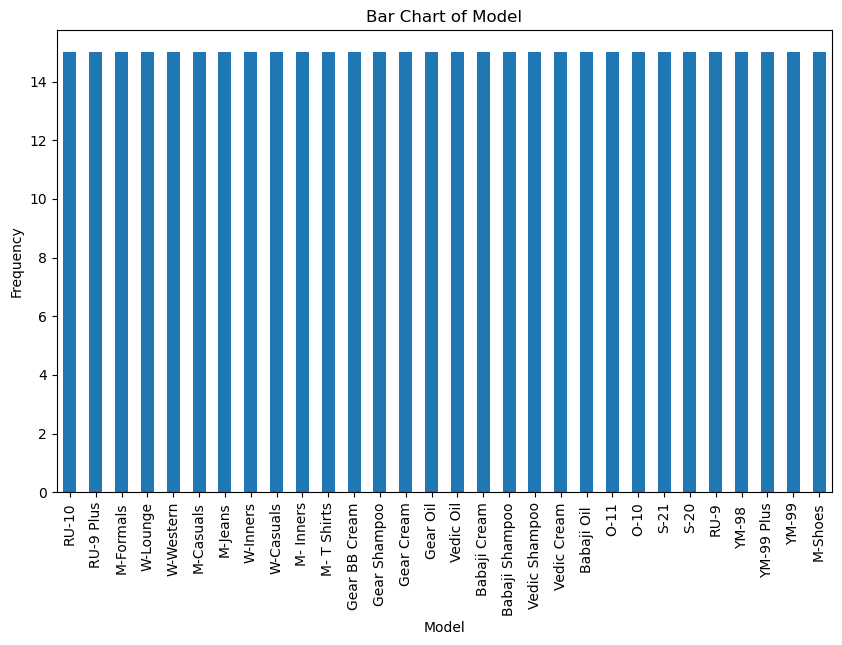

In [46]:
# bar charts for categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6)) 
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [35]:
# from above barplot 
#day - Thursday having high frequency and other have same frequency
#brand - Jeera having high frequency and orange/sumsang have low frequency

Standardization of numerical variable

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = data.copy()
df_standardized[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [49]:
# before
data[numerical_columns].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770


In [51]:
#after
df_standardized[numerical_columns].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


Conversion of Categorical Data into Dummy Variables

In [53]:
# Apply one-hot encoding to categorical columns
data_dummies = pd.get_dummies(data, columns=categorical_columns)

In [54]:
data_dummies

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
